<a href="https://colab.research.google.com/github/prof-sd1/Data-Science/blob/main/Module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5: Exploratory Data Analysis (EDA)


**Exploratory Data Analysis (EDA)** is a crucial phase in any data science or analytics project. It involves analyzing datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods. The primary goal of EDA is to gain a deeper understanding of the data, uncover patterns, identify anomalies, test hypotheses, and ensure the data is clean and ready for further analysis or model building.

## 5.1 Descriptive Statistics
Descriptive statistics are the foundational elements of understanding your data, providing crucial initial insights that guide further exploratory analysis and subsequent modeling steps.

Descriptive Statistics focuses specifically on the quantitative methods used to summarize and describe the main features of a dataset. Unlike inferential statistics, which aims to make predictions or draw conclusions about a larger population, descriptive statistics is solely concerned with the characteristics of the *observed data*.

The main components Descriptive Statistics:

### I. Measures of Central Tendency

These statistics describe the "center" or "typical" value of a dataset.

1.  **Mean (Average):**
    * **Definition:** The sum of all values divided by the number of values.
    * **Formula:** \begin{equation}\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}\end{equation}
    * **Use Case:** Best for symmetrically distributed data without extreme outliers.
    * **Sensitivity:** Highly sensitive to outliers.
2.  **Median:**
    * **Definition:** The middle value in an ordered dataset. If there's an even number of observations, it's the average of the two middle values.
    * **Formula:**
    
    Odd: \begin{equation}( x_{(\frac{n+1}{2})} )\end{equation} Even: \begin{equation}( \frac{x_{(\frac{n}{2})} + x_{(\frac{n}{2} + 1)}}{2} )\end{equation}
    * **Use Case:** Preferred for skewed distributions or data with outliers, as it is robust to extreme values.
3.  **Mode:**
    * **Definition:** The value that appears most frequently in a dataset. A dataset can have one mode (unimodal), multiple modes (multimodal), or no mode.
    * **Use Case:** Primarily used for categorical or discrete numerical data. It's the only measure of central tendency applicable to nominal data.



In [ ]:
#EXAMPLES OF MEASURES OF CENTERAL TENDENCY

import numpy as np
import pandas as pd

# Create a sample dataset
data = [1, 2, 2, 3, 4, 5, 5, 5, 6, 7]
df = pd.DataFrame(data, columns=['values'])

# Calculate Mean
mean_value = np.mean(data)
print(f"Mean (Numpy): {mean_value}")
mean_value_df = df['values'].mean()
print(f"Mean (Pandas): {mean_value_df}")

# Calculate Median
median_value = np.median(data)
print(f"\nMedian (Numpy): {median_value}")
median_value_df = df['values'].median()
print(f"Median (Pandas): {median_value_df}")

# Calculate Mode
# Using scipy for mode as numpy.mode is deprecated and pandas mode can return multiple modes
from scipy import stats
mode_value = stats.mode(data)
print(f"\nMode (Scipy): {mode_value.mode}")
mode_value_df = df['values'].mode()
print(f"Mode (Pandas): {mode_value_df.tolist()}") # Pandas mode returns a Series

Mean (Numpy): 4.0
Mean (Pandas): 4.0

Median (Numpy): 4.5
Median (Pandas): 4.5

Mode (Scipy): 5
Mode (Pandas): [5]


### II. Measures of Variability (Spread/Dispersion)

These statistics describe how spread out or dispersed the data points are from the center.

1.  **Range:**
    * **Definition:** The difference between the maximum and minimum values in a dataset.
    * **Formula:** Range = Maximum Value - Minimum Value
    * **Use Case:** Simple to calculate, but highly sensitive to outliers and only provides a limited view of data spread.
2.  **Variance:**
    * **Definition:** The average of the squared differences from the mean. It measures how far each number in the dataset is from the mean.
    * **Formula (Population):** $\sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}$
    * **Formula (Sample):** $s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$ (using $n-1$ for sample variance provides an unbiased estimate of the population variance)
    * **Units:** The units of variance are the square of the original data's units, which can make interpretation difficult.
3.  **Standard Deviation:**
    * **Definition:** The square root of the variance. It is the most commonly used measure of spread, as it is in the same units as the original data.
    * **Formula (Population):**\begin{equation} \sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}}\end{equation}
    * **Formula (Sample):** $s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$
    * **Use Case:** Provides a clear understanding of the typical deviation of data points from the mean. A higher standard deviation indicates greater variability.
4.  **Interquartile Range (IQR):**
    * **Definition:** The difference between the third quartile (Q3) and the first quartile (Q1). Q1 is the 25th percentile, and Q3 is the 75th percentile.
    * **Formula:** $IQR = Q3 - Q1$
    * **Use Case:** Robust to outliers, as it focuses on the middle 50% of the data. Useful for skewed distributions.



In [ ]:
#EXAMPLES OF MEASURES OF VARIABILITY

# Calculate Range
range_value = np.max(data) - np.min(data)
print(f"Range (Numpy): {range_value}")
range_value_df = df['values'].max() - df['values'].min()
print(f"Range (Pandas): {range_value_df}")

# Calculate Variance
# By default, numpy.var calculates population variance (ddof=0)
variance_value_pop = np.var(data)
print(f"\nPopulation Variance (Numpy): {variance_value_pop}")
# To calculate sample variance in numpy, set ddof=1
variance_value_sample_np = np.var(data, ddof=1)
print(f"Sample Variance (Numpy): {variance_value_sample_np}")
# By default, pandas.var calculates sample variance (ddof=1)
variance_value_sample_df = df['values'].var()
print(f"Sample Variance (Pandas): {variance_value_sample_df}")
# To calculate population variance in pandas, set ddof=0
variance_value_pop_df = df['values'].var(ddof=0)
print(f"Population Variance (Pandas): {variance_value_pop_df}")


# Calculate Standard Deviation
# By default, numpy.std calculates population standard deviation (ddof=0)
std_dev_value_pop = np.std(data)
print(f"\nPopulation Standard Deviation (Numpy): {std_dev_value_pop}")
# To calculate sample standard deviation in numpy, set ddof=1
std_dev_value_sample_np = np.std(data, ddof=1)
print(f"Sample Standard Deviation (Numpy): {std_dev_value_sample_np}")
# By default, pandas.std calculates sample standard deviation (ddof=1)
std_dev_value_sample_df = df['values'].std()
print(f"Sample Standard Deviation (Pandas): {std_dev_value_sample_df}")
# To calculate population standard deviation in pandas, set ddof=0
std_dev_value_pop_df = df['values'].std(ddof=0)
print(f"Population Standard Deviation (Pandas): {std_dev_value_pop_df}")


# Calculate Interquartile Range (IQR)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
iqr_value_np = Q3 - Q1
print(f"\nIQR (Numpy): {iqr_value_np}")

iqr_value_df = df['values'].quantile(0.75) - df['values'].quantile(0.25)
print(f"IQR (Pandas): {iqr_value_df}")

Range (Numpy): 6
Range (Pandas): 6

Population Variance (Numpy): 3.4
Sample Variance (Numpy): 3.7777777777777777
Sample Variance (Pandas): 3.7777777777777777
Population Variance (Pandas): 3.4

Population Standard Deviation (Numpy): 1.8439088914585775
Sample Standard Deviation (Numpy): 1.9436506316151
Sample Standard Deviation (Pandas): 1.9436506316151
Population Standard Deviation (Pandas): 1.8439088914585775

IQR (Numpy): 2.75
IQR (Pandas): 2.75


### III. Measures of Distribution Shape

These statistics describe the shape of the data's distribution.

1.  **Skewness:**
    * **Definition:** Measures the asymmetry of the probability distribution of a real-valued random variable about its mean.
    * **Types:**
        * **Positive Skew (Right-skewed):** Tail is longer on the right side; mean > median > mode.
        * **Negative Skew (Left-skewed):** Tail is longer on the left side; mean < median < mode.
        * **Zero Skew:** Symmetrical distribution (e.g., normal distribution); mean $\approx$ median $\approx$ mode.
    * **Interpretation:** Indicates whether data points are concentrated more on one side of the mean.
2.  **Kurtosis:**
    * **Definition:** Measures the "tailedness" of the probability distribution of a real-valued random variable. It describes the shape of the tails of the distribution.
    * **Types:**
        * **Mesokurtic:** Similar kurtosis to a normal distribution (e.g., a normal distribution has a kurtosis of 3, or an excess kurtosis of 0).
        * **Leptokurtic:** Higher kurtosis (positive excess kurtosis); fatter tails and a sharper peak than a normal distribution, indicating more outliers.
        * **Platykurtic:** Lower kurtosis (negative excess kurtosis); thinner tails and a flatter peak than a normal distribution, indicating fewer outliers.
    * **Interpretation:** Helps understand the presence of outliers and the general shape of the distribution's extremes.





In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Sample Data
data = [12, 15, 12, 15, 16, 16, 17, 18, 18, 19, 25]

# Create a DataFrame
df = pd.DataFrame({'values': data})

# ---------------------------
# Skewness: Measure of asymmetry
# ---------------------------

# SciPy skewness with bias correction (default: bias=False)
skew_scipy = skew(data)  # Same as skew(data, bias=False)
print(f"Skewness (SciPy, bias=False): {skew_scipy:.4f}")

# SciPy skewness without correction (like Pandas)
skew_scipy_biased = skew(data, bias=True)
print(f"Skewness (SciPy, bias=True):  {skew_scipy_biased:.4f}")

# Pandas skewness (no bias correction)
skew_pandas = df['values'].skew()
print(f"Skewness (Pandas):            {skew_pandas:.4f}")

# ---------------------------
# Kurtosis: Measure of tailedness
# ---------------------------

# SciPy kurtosis (Fisher by default)
kurt_fisher_scipy = kurtosis(data)  # kurtosis - 3
print(f"\nKurtosis (SciPy, Fisher):     {kurt_fisher_scipy:.4f}")

# SciPy kurtosis (Pearson)
kurt_pearson_scipy = kurtosis(data, fisher=False)
print(f"Kurtosis (SciPy, Pearson):    {kurt_pearson_scipy:.4f}")

# Pandas kurtosis (Fisher only)
kurt_fisher_pandas = df['values'].kurt()
print(f"Kurtosis (Pandas, Fisher):    {kurt_fisher_pandas:.4f}")

# Convert Pandas Fisher to Pearson
kurt_pearson_pandas = kurt_fisher_pandas + 3
print(f"Kurtosis (Pandas, Pearson):   {kurt_pearson_pandas:.4f}")


Skewness (SciPy, bias=False): 0.8983
Skewness (SciPy, bias=True):  0.8983
Skewness (Pandas):            1.0469

Kurtosis (SciPy, Fisher):     0.9077
Kurtosis (SciPy, Pearson):    3.9077
Kurtosis (Pandas, Fisher):    2.3461
Kurtosis (Pandas, Pearson):   5.3461


### IV. Percentiles and Quartiles

* **Percentiles:** Values that divide a dataset into 100 equal parts. The nth percentile is the value below which n% of the observations fall.
* **Quartiles:** Specific percentiles that divide the data into four equal parts:
    * **Q1 (First Quartile):** 25th percentile.
    * **Q2 (Second Quartile):** 50th percentile, which is also the median.
    * **Q3 (Third Quartile):** 75th percentile.


In [ ]:
#EXAMPLES OF PERCENTILES AND QUARTILES

# Calculate Percentiles
# 10th percentile
percentile_10 = np.percentile(data, 10)
print(f"10th Percentile (Numpy): {percentile_10}")

# 90th percentile
percentile_90 = np.percentile(data, 90)
print(f"90th Percentile (Numpy): {percentile_90}")

# Using pandas quantile for percentiles (0 to 1)
percentile_10_df = df['values'].quantile(0.1)
print(f"10th Percentile (Pandas): {percentile_10_df}")

percentile_90_df = df['values'].quantile(0.9)
print(f"90th Percentile (Pandas): {percentile_90_df}")


# Calculate Quartiles
# Q1 (25th percentile)
Q1_np = np.percentile(data, 25)
print(f"\nQ1 (25th Percentile) (Numpy): {Q1_np}")

Q1_df = df['values'].quantile(0.25)
print(f"Q1 (25th Percentile) (Pandas): {Q1_df}")

# Q2 (50th percentile / Median)
Q2_np = np.percentile(data, 50)
print(f"\nQ2 (50th Percentile / Median) (Numpy): {Q2_np}")

Q2_df = df['values'].quantile(0.50)
print(f"Q2 (50th Percentile / Median) (Pandas): {Q2_df}")

# Q3 (75th percentile)
Q3_np = np.percentile(data, 75)
print(f"\nQ3 (75th Percentile) (Numpy): {Q3_np}")

Q3_df = df['values'].quantile(0.75)
print(f"Q3 (75th Percentile) (Pandas): {Q3_df}")

10th Percentile (Numpy): 12.0
90th Percentile (Numpy): 19.0
10th Percentile (Pandas): 12.0
90th Percentile (Pandas): 19.0

Q1 (25th Percentile) (Numpy): 15.0
Q1 (25th Percentile) (Pandas): 15.0

Q2 (50th Percentile / Median) (Numpy): 16.0
Q2 (50th Percentile / Median) (Pandas): 16.0

Q3 (75th Percentile) (Numpy): 18.0
Q3 (75th Percentile) (Pandas): 18.0


### V. Application in EDA

When performing descriptive statistics within EDA, these measures are typically calculated for each relevant variable in the dataset. Common functions in programming languages like Python (Pandas) provide these summaries easily (e.g., `df.describe()`, `df.value_counts()`). The insights gained from these numerical summaries are then often complemented by visualizations (histograms, box plots, bar charts) to provide a holistic understanding of the data's characteristics.


## 5.2 Correlation Matrix & Heatmaps

"Correlation Matrix & Heatmaps," delves into essential tools for understanding the relationships between multiple variables within a dataset. This section is a crucial part of Exploratory Data Analysis (EDA) as it helps to identify patterns, multicollinearity, and potential features for predictive modeling.

### I. Correlation

**Correlation** is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's important to distinguish correlation from causation; correlation indicates a relationship, but not necessarily that one variable causes the other.

**Types of Correlation Coefficients:**

1.  **Pearson Correlation Coefficient ($\\rho$ or $r$):**
      * **Definition:** Measures the strength and direction of a *linear* relationship between two continuous variables.
      * **Range:** Values range from -1 to +1.
          * **+1:** Perfect positive linear relationship (as one variable increases, the other increases proportionally).
          * **-1:** Perfect negative linear relationship (as one variable increases, the other decreases proportionally).
          * **0:** No linear relationship.
      * **Assumptions:** Assumes that variables are normally distributed and the relationship is linear. Sensitive to outliers.
      * **Formula:** $r = \\frac{n(\\sum xy) - (\\sum x)(\\sum y)}{\\sqrt{[n\\sum x^2 - (\\sum x)^2][n\\sum y^2 - (\\sum y)^2]}}$ (for sample)
2.  **Spearman's Rank Correlation Coefficient ($\\rho$ or $r\_s$):**
      * **Definition:** Measures the strength and direction of a *monotonic* relationship between two variables. It assesses how well the relationship between two variables can be described using a monotonic function. This means that as one variable increases, the other variable either tends to increase or decrease, but not necessarily at a constant rate. It works on the *ranks* of the data rather than the raw values.
      * **Range:** Values range from -1 to +1.
      * **Use Case:** Useful for non-normally distributed data, ordinal data, or when the relationship is not strictly linear but consistently increasing or decreasing. Less sensitive to outliers than Pearson.
3.  **Kendall's Tau ($\\tau$):**
      * **Definition:** Another non-parametric measure of the strength of dependence between two variables, also based on ranks. It's often used as an alternative to Spearman's rho.
      * **Use Case:** Particularly useful with smaller sample sizes and when there are many tied ranks.

**Interpreting Correlation Strength (General Guidelines, but context matters):**

  * **0.0 to $\\pm$0.2:** Very weak or no correlation
  * **$\\pm$0.2 to $\\pm$0.4:** Weak correlation
  * **$\\pm$0.4 to $\\pm$0.6:** Moderate correlation
  * **$\\pm$0.6 to $\\pm$0.8:** Strong correlation
  * **$\\pm$0.8 to $\\pm$1.0:** Very strong correlation


In [ ]:
# EXAMPLES OF CORRELATION

import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau

# Create a sample DataFrame with numerical data
data = {'Variable A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Variable B': [2, 4, 5, 4, 5, 7, 8, 9, 10, 12],
        'Variable C': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
        'Variable D': [5, 5, 6, 7, 7, 8, 8, 9, 9, 10]} # Example with a non-linear but monotonic relationship
df_corr = pd.DataFrame(data)

print("Sample DataFrame:")
display(df_corr)

# Calculate Pearson Correlation Coefficient
pearson_corr = df_corr.corr(method='pearson')
print("\nPearson Correlation Matrix:")
display(pearson_corr)

# Calculate Spearman's Rank Correlation Coefficient
spearman_corr = df_corr.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
display(spearman_corr)

# Calculate Kendall's Tau Correlation Coefficient
kendall_corr = df_corr.corr(method='kendall')
print("\nKendall's Tau Correlation Matrix:")
display(kendall_corr)

# You can also calculate correlation between two specific columns
pearson_ab = df_corr['Variable A'].corr(df_corr['Variable B'], method='pearson')
print(f"\nPearson Correlation between A and B: {pearson_ab:.4f}")

spearman_ad = spearmanr(df_corr['Variable A'], df_corr['Variable D'])
print(f"Spearman Correlation between A and D: {spearman_ad.correlation:.4f}")

kendall_ac = kendalltau(df_corr['Variable A'], df_corr['Variable C'])
print(f"Kendall's Tau Correlation between A and C: {kendall_ac.correlation:.4f}")

Sample DataFrame:


,Variable A,Variable B,Variable C,Variable D
0,1,2,10,5
1,2,4,9,5
2,3,5,8,6
3,4,4,7,7
4,5,5,6,7
5,6,7,5,8
6,7,8,4,8
7,8,9,3,9
8,9,10,2,9
9,10,12,1,10



Pearson Correlation Matrix:


,Variable A,Variable B,Variable C,Variable D
Variable A,1.000000,0.971908,-1.000000,0.985664
Variable B,0.971908,1.000000,-0.971908,0.943923
Variable C,-1.000000,-0.971908,1.000000,-0.985664
Variable D,0.985664,0.943923,-0.985664,1.000000



Spearman Correlation Matrix:


,Variable A,Variable B,Variable C,Variable D
Variable A,1.000000,0.969530,-1.000000,0.987804
Variable B,0.969530,1.000000,-0.969530,0.947549
Variable C,-1.000000,-0.969530,1.000000,-0.987804
Variable D,0.987804,0.947549,-0.987804,1.000000



Kendall's Tau Correlation Matrix:


,Variable A,Variable B,Variable C,Variable D
Variable A,1.000000,0.932059,-1.000000,0.954521
Variable B,0.932059,1.000000,-0.932059,0.881202
Variable C,-1.000000,-0.932059,1.000000,-0.954521
Variable D,0.954521,0.881202,-0.954521,1.000000



Pearson Correlation between A and B: 0.9719
Spearman Correlation between A and D: 0.9878
Kendall's Tau Correlation between A and C: -1.0000


### II. Correlation Matrix

A **correlation matrix** is a table showing the correlation coefficients between many variables in a dataset. Each cell in the matrix represents the correlation between two specific variables.

**Key Characteristics of a Correlation Matrix:**

  * **Symmetry:** The matrix is symmetric, meaning the correlation between Variable A and Variable B is the same as the correlation between Variable B and Variable A. Thus, the upper triangle of the matrix is a mirror image of the lower triangle.
  * **Diagonal:** The diagonal elements are always 1, as a variable is perfectly correlated with itself.
  * **Size:** For a dataset with $N$ variables, the correlation matrix will be an $N \times N$ matrix.

**Purpose in EDA:**

  * **Quick Overview:** Provides a concise summary of all pairwise linear relationships.
  * **Feature Selection:** Helps identify highly correlated features. If two features are highly correlated, one might be redundant for certain modeling tasks (e.g., to reduce multicollinearity in linear regression).
  * **Understanding Relationships:** Uncovers which variables tend to move together.
  * **Anomaly Detection (sometimes):** Extremely low or high correlations where not expected can sometimes point to data issues.


### III. Heatmaps

A **heatmap** is a graphical representation of data where individual values contained in a matrix are represented as colors. In the context of a correlation matrix, a heatmap visually encodes the strength and direction of correlations, making it much easier to interpret than just looking at raw numbers.

**Key Features and Benefits of using Heatmaps for Correlation Matrices:**

1.  **Color Gradient:** A color gradient is used to represent the correlation values.
      * Typically, warm colors (reds, oranges) might represent strong positive correlations.
      * Cool colors (blues, greens) might represent strong negative correlations.
      * A neutral color (white, light gray) often represents correlations close to zero.
2.  **Immediate Visual Insight:** Allows for quick identification of strong positive, strong negative, and weak correlations without having to read every number.
3.  **Pattern Recognition:** Helps in spotting clusters of variables that are highly correlated with each other.
4.  **Clarity for Large Datasets:** For datasets with many variables, a correlation matrix can be overwhelming. A heatmap distills this information into an easily digestible visual.
5.  **Annotations:** Often, the correlation values themselves are annotated on top of the colored cells to provide precise values.

**Steps to Create and Interpret a Correlation Matrix with a Heatmap:**

1.  **Select Numerical Variables:** Correlation is typically applied to numerical variables. If you have categorical variables, you might need to encode them (e.g., one-hot encoding for nominal, label encoding for ordinal) or use specific correlation measures designed for categorical data (e.g., Cramer's V, Chi-square).
2.  **Calculate Correlation Matrix:** Use a statistical library (e.g., `df.corr()` in Pandas in Python) to compute the correlation coefficients (Pearson is the default, but you can specify Spearman or Kendall).
3.  **Generate Heatmap:** Use a visualization library (e.g., Seaborn's `heatmap()` in Python, or `corrplot` in R) to plot the correlation matrix.
4.  **Interpret the Heatmap:**
      * **Look for Bright Colors (Warm/Cool):** These indicate strong relationships.
          * Dark red/orange: Strong positive correlation.
          * Dark blue/green: Strong negative correlation.
      * **Look for Faint/Neutral Colors:** These indicate weak or no linear correlation.
      * **Identify Multicollinearity:** If two or more independent variables in a regression model are highly correlated, it indicates multicollinearity, which can be problematic for model stability and interpretability. Heatmaps quickly reveal such scenarios.
      * **Relationship with Target Variable:** If your target variable is included, you can quickly see which features have the strongest correlation with it, potentially aiding in initial feature selection.


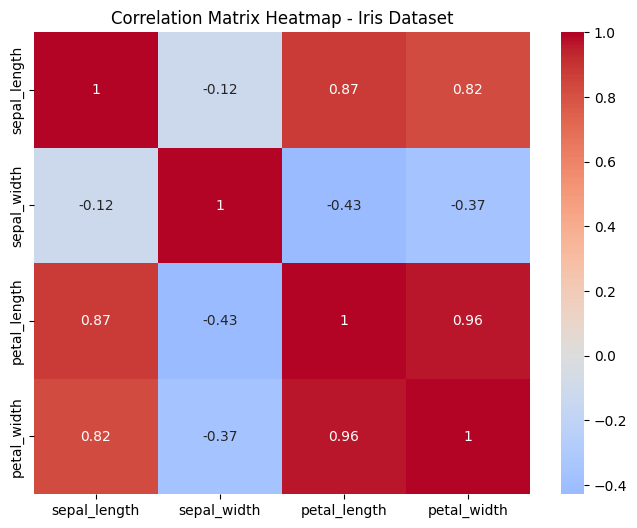

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Iris dataset
df = sns.load_dataset('iris')

# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap - Iris Dataset')
plt.show()


<Figure size 1000x800 with 0 Axes>

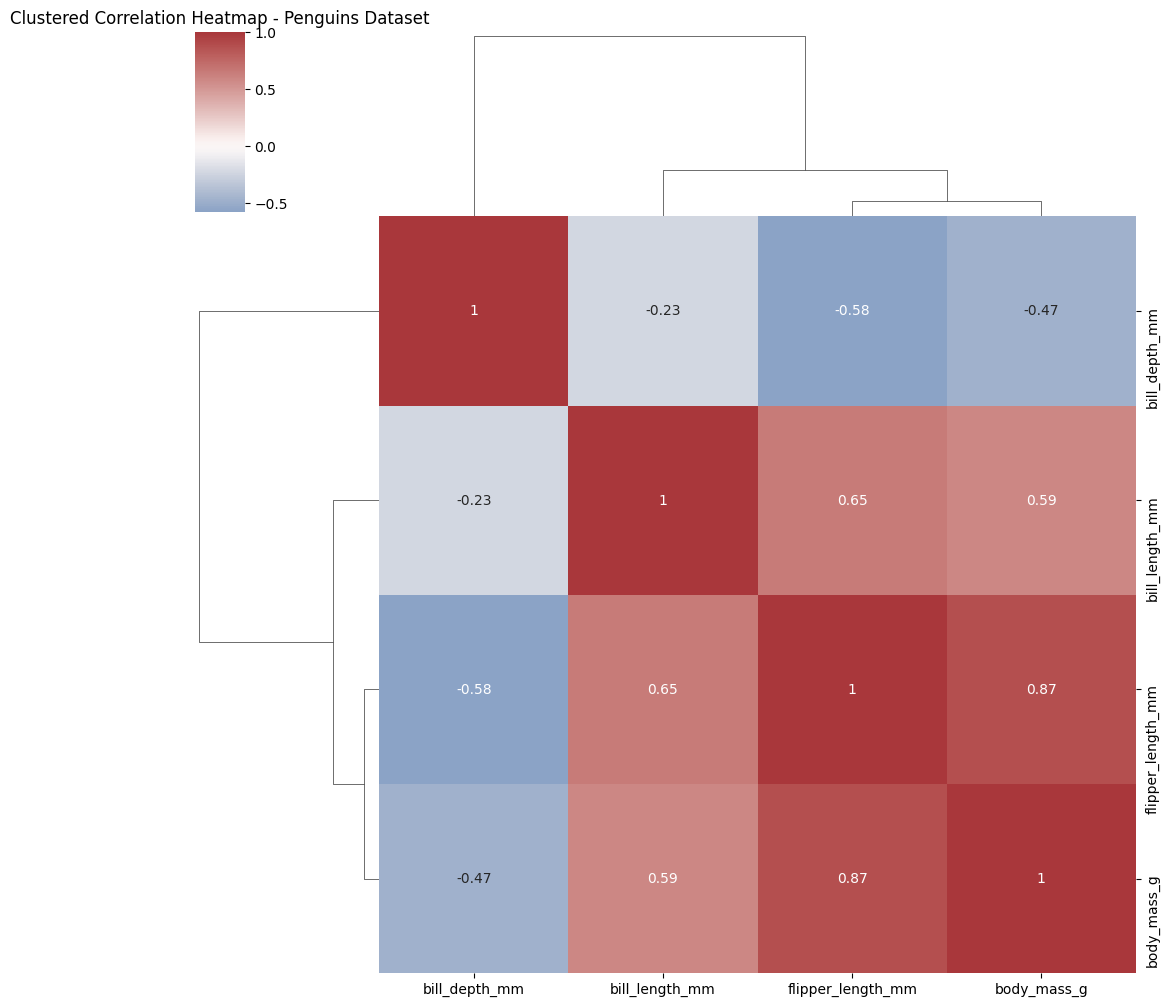

In [ ]:
# Load dataset
df = sns.load_dataset('penguins').dropna()

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Cluster the heatmap
plt.figure(figsize=(10, 8))
sns.clustermap(corr, annot=True, cmap='vlag', center=0)
plt.title('Clustered Correlation Heatmap - Penguins Dataset')
plt.show()


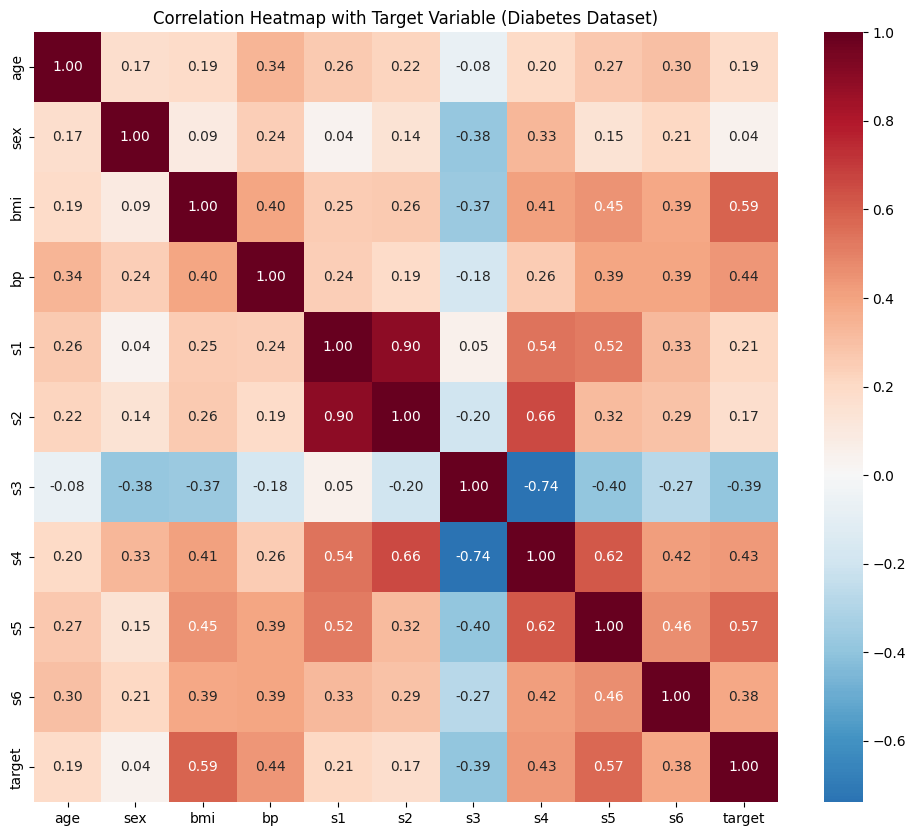

In [ ]:
# Sample dataset with a target variable
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)
df = data.frame
df['target'] = data.target

# Compute correlations including target
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap with Target Variable (Diabetes Dataset)')
plt.show()


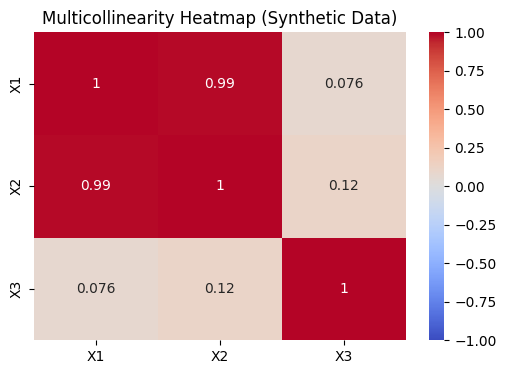

In [ ]:
import numpy as np

# Create synthetic data with multicollinearity
np.random.seed(0)
X1 = np.random.rand(100)
X2 = X1 + np.random.normal(0, 0.05, 100)  # highly correlated with X1
X3 = np.random.rand(100)
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Multicollinearity Heatmap (Synthetic Data)')
plt.show()


## 5.3 Grouping & Aggregation

Grouping & Aggregation, is a fundamental aspect of Exploratory Data Analysis (EDA) and data manipulation. It involves transforming raw data into a summarized form by grouping observations based on common characteristics and then applying aggregate functions to those groups. This process is crucial for gaining insights into subsets of data, comparing different categories, and preparing data for further analysis or visualization.

### I. The Concept of Grouping

Grouping, often referred to as "split-apply-combine" in the context of data analysis, involves three main steps:

1.  **Splitting:** Dividing the data into groups based on one or more keys (e.g., categorical columns like 'Region', 'Product Category', 'Gender').
2.  **Applying:** Applying a function (an aggregation, transformation, or filtering) to each individual group.
3.  **Combining:** Merging the results of these operations back into a single data structure, typically a DataFrame or Series, with the aggregated results for each group.

### II. Aggregation Functions

Aggregation functions reduce multiple values in a group to a single summary statistic. Common aggregation functions include:

  * **`sum()`:** Calculates the total sum of values in each group.
  * **`mean()`:** Calculates the average value in each group.
  * **`median()`:** Calculates the middle value in each group.
  * **`min()`:** Finds the minimum value in each group.
  * **`max()`:** Finds the maximum value in each group.
  * **`count()`:** Counts the number of non-null values in each group.
  * **`size()`:** Counts the total number of items in each group (including nulls).
  * **`std()`:** Calculates the standard deviation of values in each group.
  * **`var()`:** Calculates the variance of values in each group.
  * **`first()`:** Returns the first value in each group.
  * **`last()`:** Returns the last value in each group.
  * **`nunique()`:** Counts the number of unique values in each group.
  * **`mode()`:** Returns the most frequent value(s) in each group.

### III. Common Use Cases and Examples

Grouping and aggregation are invaluable for answering a wide range of analytical questions:

1.  **Comparing Group Performance:**

      * "What is the average sales per region?"
      * "Which product category has the highest total revenue?"
      * "How does customer churn vary by subscription type?"

2.  **Summarizing Data by Categories:**

      * "Count the number of orders placed by each customer."
      * "Find the earliest and latest transaction date for each user."

3.  **Identifying Trends within Groups:**

      * "Calculate the total quantity of items sold each month for a specific product."

4.  **Feature Engineering:**

      * Creating new features for machine learning models, such as the `mean_purchase_value_by_customer` or `count_of_transactions_by_user`.

### IV. Practical Implementation (using Python with Pandas)

The Pandas library in Python provides powerful and intuitive methods for grouping and aggregation, primarily through the `groupby()` method combined with aggregation functions.

**Basic Syntax:**
```
df.groupby('column_to_group_by')['column_to_aggregate'].agg('aggregation_function')
```

**Examples:**

Let's assume we have a DataFrame `df` with columns like `Region`, `Product_Category`, `Sales`, `Quantity`, `Customer_ID`.

1.  **Total Sales per Region:**

In [ ]:
import pandas as pd
# Sample data
data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East'],
    'Sales': [250, 400, 300, 150, 200, 350, 400]
}

# Create DataFrame
df = pd.DataFrame(data)
regional_sales = df.groupby('Region')['Sales'].sum()
print(regional_sales)

Region
East     700
North    450
South    750
West     150
Name: Sales, dtype: int64


2.  **Average Quantity Sold per Product Category:**

In [ ]:
import pandas as pd

# Sample data
data = {
    'Product_Category': ['Electronics', 'Clothing', 'Electronics', 'Books', 'Books', 'Clothing', 'Books'],
    'Quantity': [5, 3, 8, 2, 6, 4, 7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by Product_Category and calculate mean Quantity
avg_quantity_per_category = df.groupby('Product_Category')['Quantity'].mean()

# Print the result
print(avg_quantity_per_category)


Product_Category
Books          5.0
Clothing       3.5
Electronics    6.5
Name: Quantity, dtype: float64


3.  **Multiple Aggregations on a Single Column:**
    You can apply multiple aggregation functions to a single column by passing a list of function names or using a dictionary for custom names.

In [ ]:
import pandas as pd

# Sample dataset
data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'],
    'Sales': [300, 450, 250, 400, 500, 550, 300, 600]
}

# Create DataFrame
df = pd.DataFrame(data)

# Standard aggregation with default column names
sales_summary = df.groupby('Region')['Sales'].agg(['sum', 'mean', 'median', 'count'])
print("=== Sales Summary ===")
print(sales_summary)

# Custom-named aggregation
sales_summary_custom = df.groupby('Region')['Sales'].agg(
    Total_Sales=('sum'),
    Average_Sales=('mean')
)
print("\n=== Custom Named Sales Summary ===")
print(sales_summary_custom)


=== Sales Summary ===
         sum   mean  median  count
Region                            
East     550  275.0   275.0      2
North    800  400.0   400.0      2
South   1000  500.0   500.0      2
West    1000  500.0   500.0      2

=== Custom Named Sales Summary ===
        Total_Sales  Average_Sales
Region                            
East            550          275.0
North           800          400.0
South          1000          500.0
West           1000          500.0


4.  **Aggregating Multiple Columns:**
    You can aggregate different columns with different functions.

In [ ]:
import pandas as pd

# Sample data
data = {
    'Product_Category': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Clothing', 'Books', 'Books'],
    'Sales': [1000, 500, 300, 1200, 700, 400, 600],
    'Quantity': [2, 1, 3, 2, 2, 4, 1],
    'Customer_ID': ['C1', 'C2', 'C3', 'C1', 'C4', 'C5', 'C3']
}

# Create DataFrame
df = pd.DataFrame(data)

# Aggregated stats per Product Category
product_category_stats = df.groupby('Product_Category').agg(
    Total_Sales=('Sales', 'sum'),
    Average_Quantity=('Quantity', 'mean'),
    Num_Customers=('Customer_ID', 'nunique')
)

# Print results
print(product_category_stats)


                  Total_Sales  Average_Quantity  Num_Customers
Product_Category                                              
Books                    1300          2.666667              2
Clothing                 1200          1.500000              2
Electronics              2200          2.000000              1


5.  **Grouping by Multiple Columns:**
    You can group by more than one column to create sub-groups.

In [ ]:
import pandas as pd

# Sample data
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West'],
    'Product_Category': ['Electronics', 'Books', 'Electronics', 'Books', 'Books', 'Clothing', 'Clothing', 'Electronics'],
    'Sales': [500, 200, 600, 300, 400, 350, 150, 450]
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by Region and Product_Category, then sum Sales
region_product_sales = df.groupby(['Region', 'Product_Category'])['Sales'].sum()

# Print result
print(region_product_sales)


Region  Product_Category
East    Books               400
        Clothing            350
North   Books               200
        Electronics         500
South   Books               300
        Electronics         600
West    Clothing            150
        Electronics         450
Name: Sales, dtype: int64


In [ ]:
# To view as a more readable table
region_product_sales_df = region_product_sales.unstack()
print(region_product_sales_df)

Product_Category  Books  Clothing  Electronics
Region                                        
East              400.0     350.0          NaN
North             200.0       NaN        500.0
South             300.0       NaN        600.0
West                NaN     150.0        450.0


### V. Advanced Grouping Techniques

  * **`transform()`:** Applies a function to each group and returns a Series with the same index as the original DataFrame, effectively broadcasting the aggregated value back to the original rows. Useful for creating features based on group-wise properties.

In [ ]:
df['Avg_Sales_Per_Region'] = df.groupby('Region')['Sales'].transform('mean')
print(df.head()) # Now each row has the average sales of its region

  Region Product_Category  Sales  Avg_Sales_Per_Region
0  North      Electronics    500                 350.0
1  North            Books    200                 350.0
2  South      Electronics    600                 450.0
3  South            Books    300                 450.0
4   East            Books    400                 375.0


* **`filter()`:** Filters data within groups based on a condition applied to the group.

In [ ]:
# Keep only regions where total sales are greater than 100000
filtered_df = df.groupby('Region').filter(lambda x: x['Sales'].sum() > 500)
print(filtered_df['Region'].unique())

['North' 'South' 'East' 'West']


* **`apply()`:** A highly flexible method that can apply an arbitrary function to each group. This is used when `agg()`, `transform()`, or `filter()` are not sufficient.

In [ ]:
def top_n_sales(group, n=3):
    return group.sort_values(by='Sales', ascending=False).head(n)

top_products_per_region = df.groupby('Region').apply(top_n_sales)
print(top_products_per_region)

         Region Product_Category  Sales  Avg_Sales_Per_Region
Region                                                       
East   4   East            Books    400                 375.0
       5   East         Clothing    350                 375.0
North  0  North      Electronics    500                 350.0
       1  North            Books    200                 350.0
South  2  South      Electronics    600                 450.0
       3  South            Books    300                 450.0
West   7   West      Electronics    450                 300.0
       6   West         Clothing    150                 300.0


/tmp/ipython-input-30-3064350184.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_per_region = df.groupby('Region').apply(top_n_sales)


Grouping and aggregation are cornerstone operations in data analysis, enabling data scientists and analysts to distill large datasets into meaningful summaries, identify trends, and prepare data for advanced analytical tasks.

## 5.4 Feature Distribution Analysis

Feature Distribution Analysis is a critical component of Exploratory Data Analysis (EDA) focused on understanding the individual characteristics of each variable (feature) within a dataset. This analysis helps to reveal the underlying structure of the data, identify anomalies, guide data cleaning, and inform feature engineering and model selection.

The primary goal is to examine how values for a single feature are spread across its possible range. This is often referred to as **univariate analysis**.

### I. Objectives of Feature Distribution Analysis

1.  **Understand Data Spread and Central Tendency:** Visually and numerically assess where most data points lie (mean, median, mode) and how spread out they are (variance, standard deviation, range, IQR).
2.  **Identify Data Types:** Confirm the actual data type (numerical, categorical, ordinal, datetime) and whether it aligns with expectations.
3.  **Detect Outliers:** Identify extreme values that might be errors or significant observations requiring special attention.
4.  **Assess Skewness and Kurtosis:** Determine if the distribution is symmetric or skewed, and if it has heavy or light tails. This impacts the choice of statistical tests and machine learning models.
5.  **Identify Multimodality:** Discover if the data has multiple peaks, suggesting the presence of distinct subgroups within the data.
6.  **Spot Missing Values:** Visually identify the presence and patterns of missing data.
7.  **Inform Data Preprocessing:** Guide decisions on transformations (e.g., log transformation for skewed data), scaling, normalization, and outlier treatment.

### II. Key Techniques and Visualizations

Feature distribution analysis relies heavily on both numerical summaries (from Descriptive Statistics, covered in 5.1) and various graphical representations.

#### A. For Numerical Features:

These features represent quantities and can be measured.

1.  **Histograms:**

      * **Purpose:** Show the frequency distribution of a numerical variable. The x-axis represents bins (ranges of values), and the y-axis represents the frequency (count or proportion) of observations falling into each bin.
      * **Insights:**
          * **Shape:** Skewness (left/right), symmetry, normal distribution, uniform distribution.
          * **Central Tendency:** Where the peak is located.
          * **Spread:** How wide or narrow the distribution is.
          * **Outliers:** Isolated bars far from the main distribution.
          * **Modality:** Unimodal (one peak), bimodal (two peaks), multimodal (multiple peaks).
      * **Example (Conceptual Python using Matplotlib/Seaborn):**

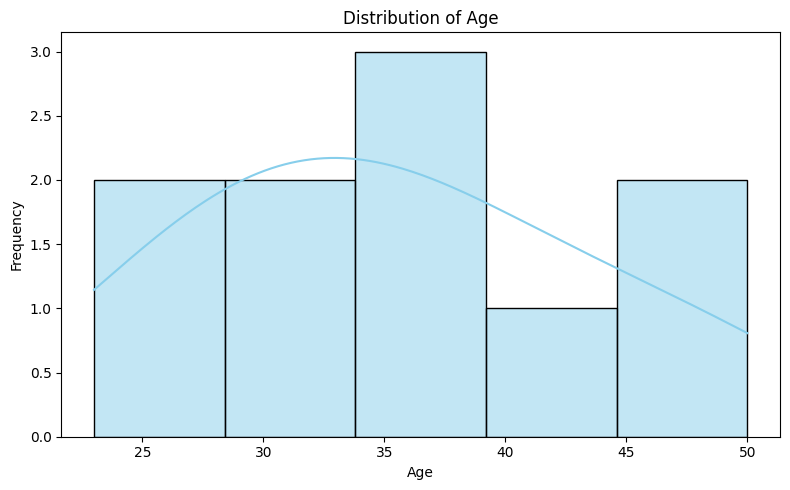

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame with Age column
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian', 'Jane'],
    'Age': [23, 35, 45, 31, 29, 41, 38, 27, 34, 50]
}

df = pd.DataFrame(data)

# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', kde=True, bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()


2.  **Kernel Density Estimation (KDE) Plots:**

      * **Purpose:** Provide a smooth, continuous estimate of the probability density function of a numerical variable. It's essentially a smoothed histogram.
      * **Insights:** Similar to histograms, but better for visualizing the shape and identifying multimodality without the binning artifacts of histograms.
      * **Example:** (Often combined with `histplot` using `kde=True` as shown above, or as a standalone `sns.kdeplot`).

3.  **Box Plots (Box-and-Whisker Plots):**

      * **Purpose:** Summarize the distribution of a numerical variable, highlighting the median, quartiles, and potential outliers.
      * **Insights:**
          * **Median:** The line inside the box (Q2, 50th percentile).
          * **Interquartile Range (IQR):** The box itself, spanning from Q1 (25th percentile) to Q3 (75th percentile).
          * **Whiskers:** Extend to the most extreme data points within 1.5 times the IQR from the box.
          * **Outliers:** Individual points plotted beyond the whiskers.
          * **Skewness:** The position of the median within the box and the length of the whiskers can indicate skewness.
      * **Example:**

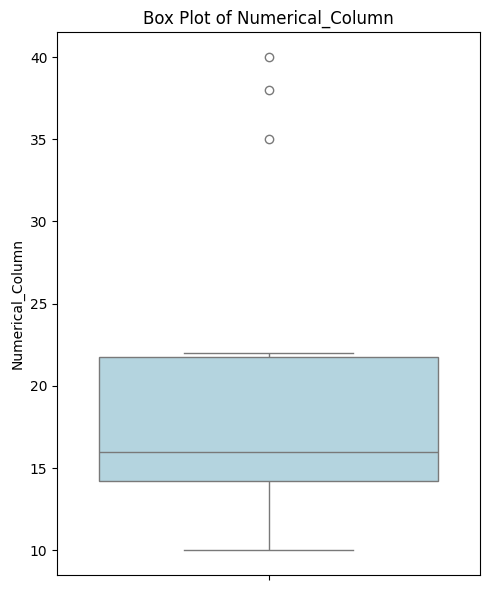

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
data = {
    'Numerical_Column': [10, 15, 14, 18, 21, 13, 16, 22, 35, 40, 38, 14, 15, 16]
}

df = pd.DataFrame(data)

# Create the box plot
plt.figure(figsize=(5, 6))
sns.boxplot(data=df, y='Numerical_Column', color='lightblue')

# Add title
plt.title('Box Plot of Numerical_Column')

# Show plot
plt.tight_layout()
plt.show()


4.  **Violin Plots:**

      * **Purpose:** Combine aspects of a box plot and a KDE plot. They show the distribution of a numerical variable and its density.
      * **Insights:** Provide a richer view of the distribution shape than box plots, especially revealing multimodality.
      * **Example:**

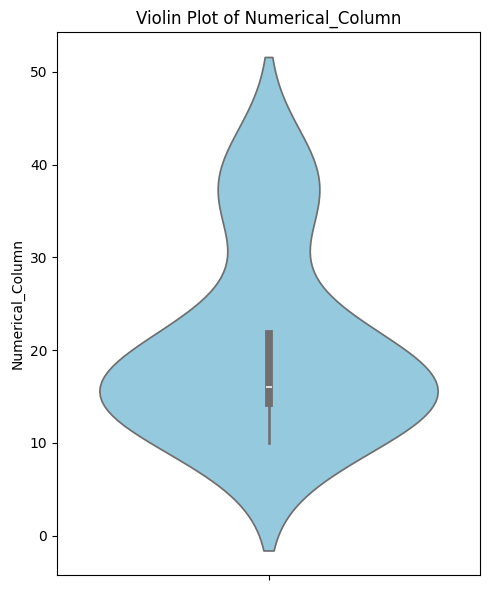

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Numerical_Column': [10, 15, 14, 18, 21, 13, 16, 22, 35, 40, 38, 14, 15, 16]
}

df = pd.DataFrame(data)

# Violin plot
plt.figure(figsize=(5, 6))
sns.violinplot(data=df, y='Numerical_Column', inner='box', color='skyblue')

# Title
plt.title('Violin Plot of Numerical_Column')

# Show plot
plt.tight_layout()
plt.show()


#### B. For Categorical Features:

These features represent distinct categories or groups.

1.  **Bar Charts (Count Plots):**

      * **Purpose:** Show the frequency or count of observations for each category in a categorical variable.
      * **Insights:**
          * **Distribution:** Which categories are most/least frequent.
          * **Imbalance:** Identify imbalanced classes (where some categories have very few observations, which can be problematic for modeling).
          * **Missing Categories:** Whether expected categories are present.
      * **Example:**

/tmp/ipython-input-36-3724194059.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


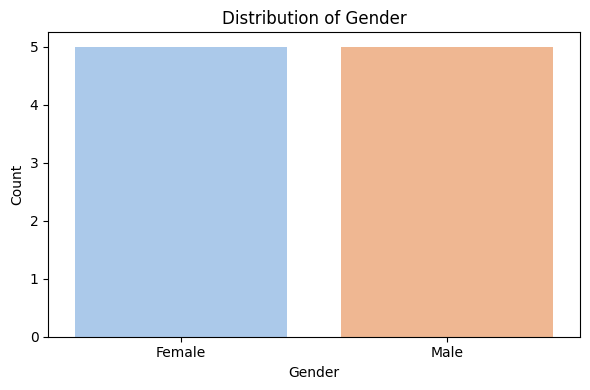

Frequency Counts:
Gender
Female    5
Male      5
Name: count, dtype: int64

Proportional Distribution:
Gender
Female    0.5
Male      0.5
Name: proportion, dtype: float64


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Evan', 'Fiona', 'George', 'Hannah', 'Ian', 'Jill'],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']
}

df = pd.DataFrame(data)

# Count plot (bar chart of categorical frequency)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Frequency counts
print("Frequency Counts:")
print(df['Gender'].value_counts())

# Proportions (normalized counts)
print("\nProportional Distribution:")
print(df['Gender'].value_counts(normalize=True))


2.  **Pie Charts (Use with Caution):**

      * **Purpose:** Show the proportion of each category relative to the whole.
      * **Caution:** Generally discouraged for more than a few categories (e.g., 5-7), as comparing slice sizes can be difficult. Bar charts are usually preferred.
      * **Example:**

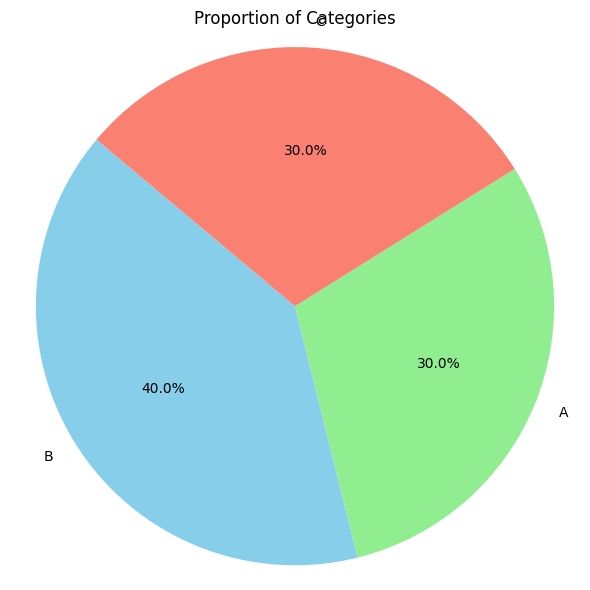

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'B', 'C']
}

df = pd.DataFrame(data)

# Value counts
category_counts = df['Category'].value_counts()
category_labels = category_counts.index

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Proportion of Categories')
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.tight_layout()
plt.show()


#### C. For Ordinal Features:

These are categorical features with a meaningful order. They can often be treated like categorical features (using bar charts) or sometimes like numerical features if the order implies a numerical progression.

### III. Iterative Process

Feature distribution analysis is iterative. Insights from one visualization might lead to further questions, deeper dives into subsets of data (using grouping), or consideration of data transformations. For example, if a numerical feature is highly skewed, you might consider a log transformation and then re-examine its distribution.

By thoroughly analyzing the distribution of each feature, data scientists can gain a solid foundation for understanding their dataset, making informed decisions about data cleaning, preprocessing, and ultimately, building more robust and accurate models.

## 5.5 Visual Storytelling Best Practices

**Visual Storytelling Best Practices** focuses on the art and science of communicating insights from data effectively through compelling visuals. It's not just about creating aesthetically pleasing charts; it's about conveying a clear, impactful message that resonates with your audience and drives understanding or action. This module builds upon the technical aspects of EDA by emphasizing how to present your findings in a digestible, persuasive, and ethical manner.

key best practices for visual storytelling:

### I. Understand Your Audience and Define Your Purpose

This foundational step is paramount. Before even considering a chart type, answer these critical questions:

* **Who is your audience?** (e.g., technical experts, business executives, general public). Tailor your visuals, terminology, and level of detail to their background, existing knowledge, and what specific information is relevant to them.
    * *Example:* If presenting sales data to **marketing executives**, focus on trends and opportunities for campaigns. If presenting to **engineers**, you might dive deeper into the statistical significance of product performance variations.
* **What is the single, most important message or insight?** Every visualization and narrative point should unequivocally support this central message. Your goal is not merely to display data, but to articulate its meaning and significance.
    * *Example:* Instead of just showing a chart of "Monthly Website Traffic," your message could be "**Our new content strategy boosted organic traffic by 30% in Q2.**"
* **What action do you want them to take?** (e.g., approve a budget, revise a strategy, gain specific understanding). Your entire story should logically lead them towards this desired outcome, providing the necessary evidence and context.
    * *Example:* If the insight is that "Customer churn increased by 5% due to poor customer service," the desired action might be "**Allocate resources to improve our customer support team's training and tools.**"

---

### II. Choose the Right Chart Type for Your Data and Message

Selecting the appropriate visualization is paramount for clear and accurate communication. Misleading or inappropriate charts can obscure insights, misrepresent data, or confuse your audience.

* **Comparison:**
    * **Bar charts:** Ideal for comparing discrete categories. (e.g., *[Visual Reference: Simple bar chart comparing "Sales by Region"]*)
    * **Line charts:** Excellent for showing trends and changes over time. (e.g., *[Visual Reference: Line chart showing "Monthly Revenue Growth Over the Past Year"]*)
* **Distribution:**
    * **Histograms, KDE plots, Box plots, Violin plots:** Best for understanding the spread, central tendency, and shape of single numerical variables, or for comparing distributions across different categories. (e.g., *[Visual Reference: Histogram of "Distribution of Customer Ages" vs. Box plot comparing "Salaries by Department"]*)
* **Relationship/Correlation:**
    * **Scatter plots:** Reveal relationships and correlations between two numerical variables. (e.g., *[Visual Reference: Scatter plot of "Marketing Spend vs. Sales Revenue"]*)
    * **Heatmaps:** Visualize correlations among multiple variables efficiently. (e.g., *[Visual Reference: Heatmap of a correlation matrix between financial indicators]*)
* **Composition/Part-to-Whole:**
    * **Stacked Bar charts, Treemaps:** Preferred for showing how parts make up a whole, especially with multiple categories. (e.g., *[Visual Reference: Stacked bar chart showing "Market Share of Competitors Over Time"]*)
    * **Avoid Pie Charts:** Generally, avoid pie charts for more than 2-3 categories or when precise comparisons between slices are necessary, as human perception struggles with comparing angles. (e.g., *[Visual Reference: Bad Example: Pie chart with 10 slices. Good Alternative: Sorted bar chart for the same data.]*)

---

### III. Simplify and Declutter Your Visuals

Maximizing the "**data-ink ratio**" is key. Every element in your chart should serve a clear purpose in conveying information.

* **Remove Chart Junk:** Eliminate anything that distracts from the data.
    * *Example:* Compare a **cluttered bar chart** (heavy 3D bars, textured background, excessive gridlines) to a **decluttered bar chart** (clean 2D bars, light gridlines only on the y-axis, no background).
* **Direct Labeling:** Whenever feasible, label data points, lines, or bars directly on the chart rather than solely relying on a separate legend, especially for charts with a limited number of elements.
    * *Example:* On a line chart showing "Product A Sales" and "Product B Sales," instead of a separate legend, **label the lines "Product A" and "Product B" directly** next to their respective lines.
* **Meaningful Titles and Labels:** Ensure axes are clearly labeled with units, and the chart boasts a concise, descriptive title that directly highlights the main insight or question being addressed.
    * *Example:* **Bad Title:** "Graph 1". **Good Title:** "**Q1 2025 Sales Exceeded Targets by 15%**".
* **Limit Data Points:** Avoid overwhelming your audience by cramming too much information into a single chart. Consider breaking down complex data into multiple, focused charts or leveraging interactive elements for deeper exploration.
    * *Example:* Instead of one chart showing daily stock prices for 50 companies over a year, **show 3-5 key companies** or provide an interactive dashboard.

---

### IV. Use Color Strategically and Thoughtfully

Color is a powerful **pre-attentive attribute** that can immediately draw attention and convey meaning, but it must be used with precision.

* **Purposeful Color:** Utilize color to emphasize key data points, differentiate distinct categories, or represent different values (e.g., sequential palettes for numerical gradients, divergent palettes for positive/negative values).
    * *Example:* Using a **bright red** to highlight "Product C" (underperforming) while other products are in muted blues.
* **Consistency:** Maintain consistent color schemes for the same categories across all your visualizations to avoid confusion.
    * *Example:* If "Europe" is always blue in one chart, **keep it blue** in all subsequent charts discussing European data.
* **Accessibility:** Design for all viewers. Opt for color palettes that are colorblind-friendly, and whenever possible, combine color with other visual cues (e.g., patterns, text labels) to ensure clarity.
    * *Example:* Instead of just red/green for "pass/fail," **use red/green and add a checkmark/X icon or labels.**
* **Avoid Overuse:** Too many colors can be distracting, make the chart appear cluttered, and dilute the intended message.
    * *Example:* Compare a **"rainbow" bar chart** (each bar a different color) to one using **shades of a single color** or distinct colors for meaningful categories only.

---

### V. Emphasize Key Insights and Guide the Eye

Direct your audience's attention to the most crucial aspects of your data.

* **Highlight Important Data:** Employ bolder colors, strategic annotations, arrows, or distinct line styles to draw focus to significant trends, specific data points, or outliers.
    * *Example:* On a sales trend line chart, a **bold, dashed line** indicates a new marketing campaign launch, and an **arrow** points to the subsequent sales spike.
* **Strategic Placement:** Position the most vital information prominently within the visual field.
    * *Example:* Placing the most significant data point or the concluding summary statistic in the **top-right corner**, where eyes naturally gravitate.
* **Annotations and Callouts:** Integrate concise text directly onto the chart to explain specific data points, unusual observations, or important events that influenced the data.
    * *Example:* An annotation on a specific bar stating: "**Highest sales for this product due to holiday promotion.**"
* **Comparisons:** Clearly illustrate comparisons through thoughtful juxtaposition of elements or by incorporating reference lines (e.g., average, target, benchmark).
    * *Example:* A line chart showing actual performance with a **dashed red line** representing the "Target Performance."

---

### VI. Create a Cohesive Narrative Flow

Your sequence of visualizations should tell a compelling story, guiding your audience through the insights rather than just presenting disconnected data points.

* **Beginning, Middle, End:** Structure your presentation like a narrative: an introduction (setting the context and problem), a body (presenting data insights with supporting visuals), and a conclusion (summarizing key findings, offering recommendations, or outlining next steps).
* **Logical Progression:** Arrange charts in a logical sequence that builds understanding step-by-step. Each chart should answer a question or support a specific point, naturally leading to the next revelation.
    * *Example:* Start with an overall sales trend, then break it down by product category, then by region within the top category.
* **Context is King:** Provide sufficient background information for your audience to grasp the significance and relevance of the data.
    * *Example:* Before showing a decline in product usage, **explain a recent software update or market change** that might have influenced the data.
* **Concise Language:** Employ clear, concise language in all titles, subtitles, and accompanying text to support the visual message.
    * *Example:* Instead of "Dataset showing various aspects of consumer behavior and interaction frequencies across different platform touchpoints," use "**How Users Engage with Our Platform.**"
* **Storyboarding:** Consider storyboarding your presentation. Plan the precise sequence of your charts and the intended message each one conveys to ensure a coherent and impactful narrative.
    * *Example:* Sketching out slides, each with a mini-chart and a one-sentence takeaway message, before building the full presentation.

---

### VII. Ensure Accuracy, Integrity, and Ethical Representation

Ethical visualization is paramount. Your charts must be trustworthy and not mislead your audience.

* **Appropriate Scales:** For bar charts, quantitative axes should generally start at zero to avoid exaggerating differences in magnitude. If not starting at zero (e.g., for line charts to highlight subtle changes), clearly indicate this omission and explain why.
    * *Example:* **Bad Example:** A bar chart with a Y-axis starting at 85, making a 5-unit difference (90 vs. 95) look enormous. **Good Example:** The same chart with a Y-axis starting at zero, accurately depicting the small difference.
* **Consistent Scales:** Utilize consistent scales across charts when comparing similar metrics to allow for accurate visual comparison.
    * *Example:* If comparing average customer ratings for different services, ensure all bar charts use the **same 1-5 scale**.
* **Avoid Distortions:** Be highly mindful of how certain chart choices (e.g., 3D effects, stretched or compressed axes) can inadvertently distort perception or misrepresent the data.
    * *Example:* **Avoid 3D pie charts** where slices in the foreground appear larger than identical slices in the background.
* **Cite Sources:** Always attribute external data sources to maintain credibility and transparency.
    * *Example:* Adding "(Source: [Data Provider Name], 2024)" at the bottom of a chart.
* **Ethical Responsibility:** Beyond numerical accuracy, consider the broader ethical implications. Ensure your visualizations are fair, transparent, and do not inadvertently reinforce harmful biases or misinterpretations.
    * *Example:* Carefully selecting data points and aggregation methods to avoid subtly stereotyping or misrepresenting demographic groups.

---

### VIII. Iterate and Gather Feedback

The process of creating effective data stories is often iterative.

* **Test Your Story:** Share your visualizations and accompanying narrative with others, particularly those from your target audience. Observe their reactions and solicit feedback on clarity, impact, and ease of understanding.
    * *Example:* Presenting your charts to a colleague unfamiliar with the dataset and asking, "**What is the main takeaway from this chart?**"
* **Refine and Improve:** Be prepared to iterate and refine your visualizations and narrative based on the feedback received. This iterative process is crucial for maximizing the effectiveness of your data storytelling.
    * *Example:* If feedback indicates a chart is "too busy," you might **remove extra labels, simplify the color palette, or split it into two separate charts.**

---

###  Quick Visual Storytelling Checklist:

* [ ] Have I **defined my audience and key message**?
* [ ] Is the chosen **chart type appropriate** for the data and message?
* [ ] Have I **removed unnecessary visual clutter**?
* [ ] Am I using **color purposefully and accessibly**?
* [ ] Are my visuals **ethically accurate and clearly labeled**?
* [ ] Does the presentation **flow logically** like a narrative?

---

###  Tool Tips for Visual Storytelling:

Here are some popular tools and libraries that can help you create effective and compelling data visualizations:

* **Python Libraries:**
    * **Seaborn:** Built on Matplotlib, offering a high-level interface for drawing attractive and informative statistical graphics. Great for EDA.
    * **Plotly:** For interactive, web-based visualizations that can be embedded in notebooks, dashboards, or web applications.
    * **Altair:** A declarative statistical visualization library for Python, based on Vega-Lite, excellent for quickly building interactive and informative plots.
* **Business Intelligence (BI) Tools:**
    * **Tableau:** A powerful and widely used tool for creating interactive dashboards and reports with drag-and-drop functionality.
    * **Microsoft Power BI:** Another popular BI tool integrated with the Microsoft ecosystem, offering robust data visualization and reporting features.
* **Design & Presentation Tools:**
    * **Canva:** User-friendly online graphic design tool for creating polished slides, adding annotations, and improving overall layout.
    * **Figma:** A collaborative interface design tool that can be used for storyboarding presentations, prototyping dashboards, and designing custom visual elements.

---

By rigorously adhering to these best practices and leveraging appropriate tools, you can transform raw data into compelling visual narratives that effectively communicate insights, deeply engage your audience, and ultimately facilitate more informed, data-driven decision-making.
